# Car Price Prediction Analysis

### Overview 
A Chinese automobile company plans to enter the US market by establishing a local manufacturing unit to produce cars and compete with American and European brands. To succeed, they have contracted an automobile consulting firm to analyze the factors influencing car prices in the US market, which may differ significantly from those in the Chinese market.

The company seeks to understand:
Which variables are significant in predicting car prices. 
How well these variables explain the price of a car?
    

## Objective

The objective of this analysis is to model car prices in the US market and provide actionable insights for a Chinese automobile company entering the market. The key goals are:

1.Identify Significant Factors: Determine the variables that significantly influence car prices.

2.Build Predictive Models: Develop regression models to accurately predict car prices based on independent variables.

3.Evaluate Model Performance: Compare various models to identify the best one for understanding pricing dynamics.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Preprocessing

In [16]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.head(5)  

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
df.duplicated().sum()

0

In [27]:
df.shape

(205, 26)

In [29]:
# Identifing numerical columns
num_cols = df.select_dtypes(include = 'number').columns
num_cols.shape

(16,)

In [31]:
# Identifing categorical columns
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols.shape

(10,)

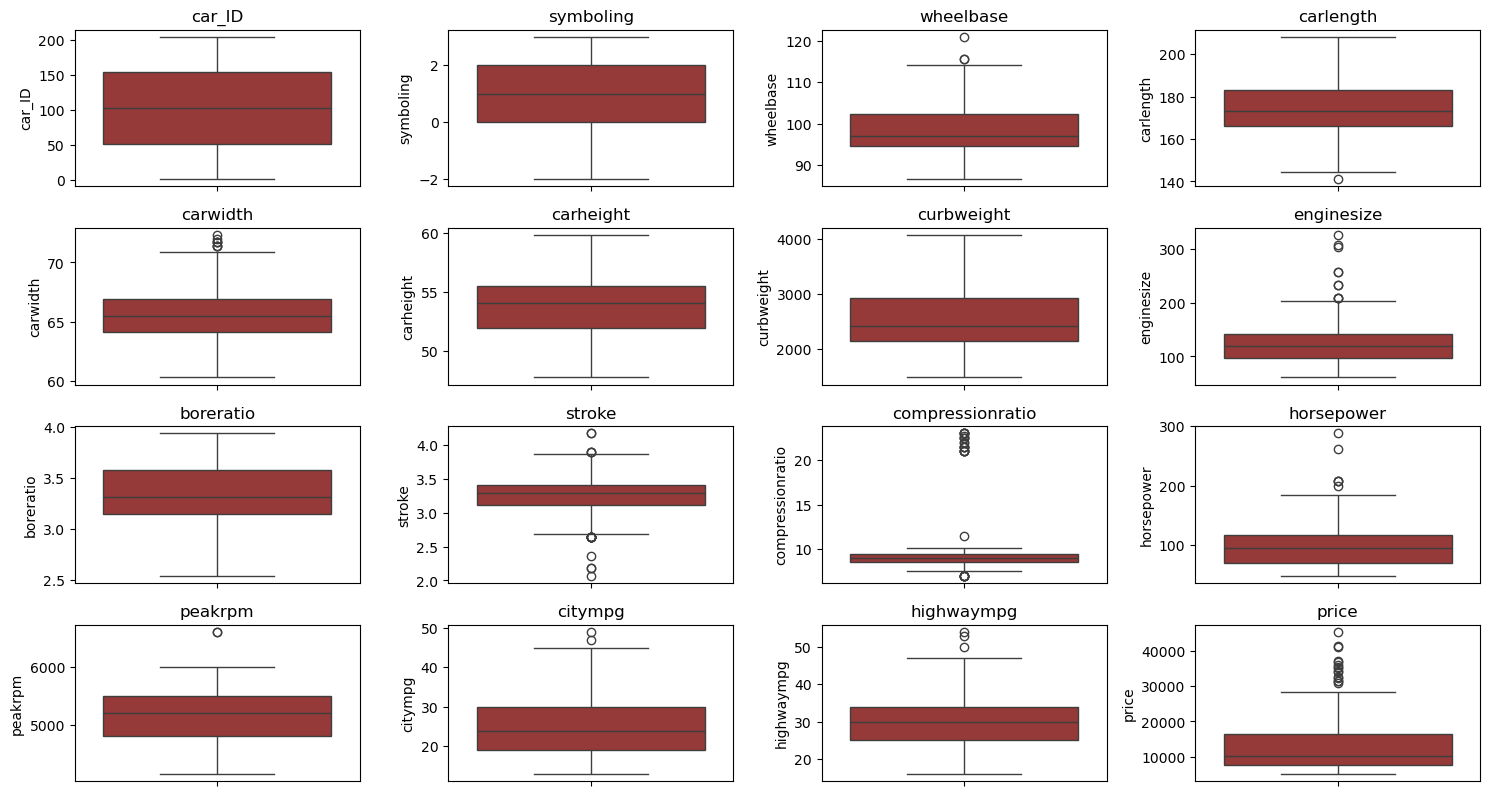

In [116]:
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col],color="brown")
    plt.title(col)
plt.tight_layout()
plt.show()

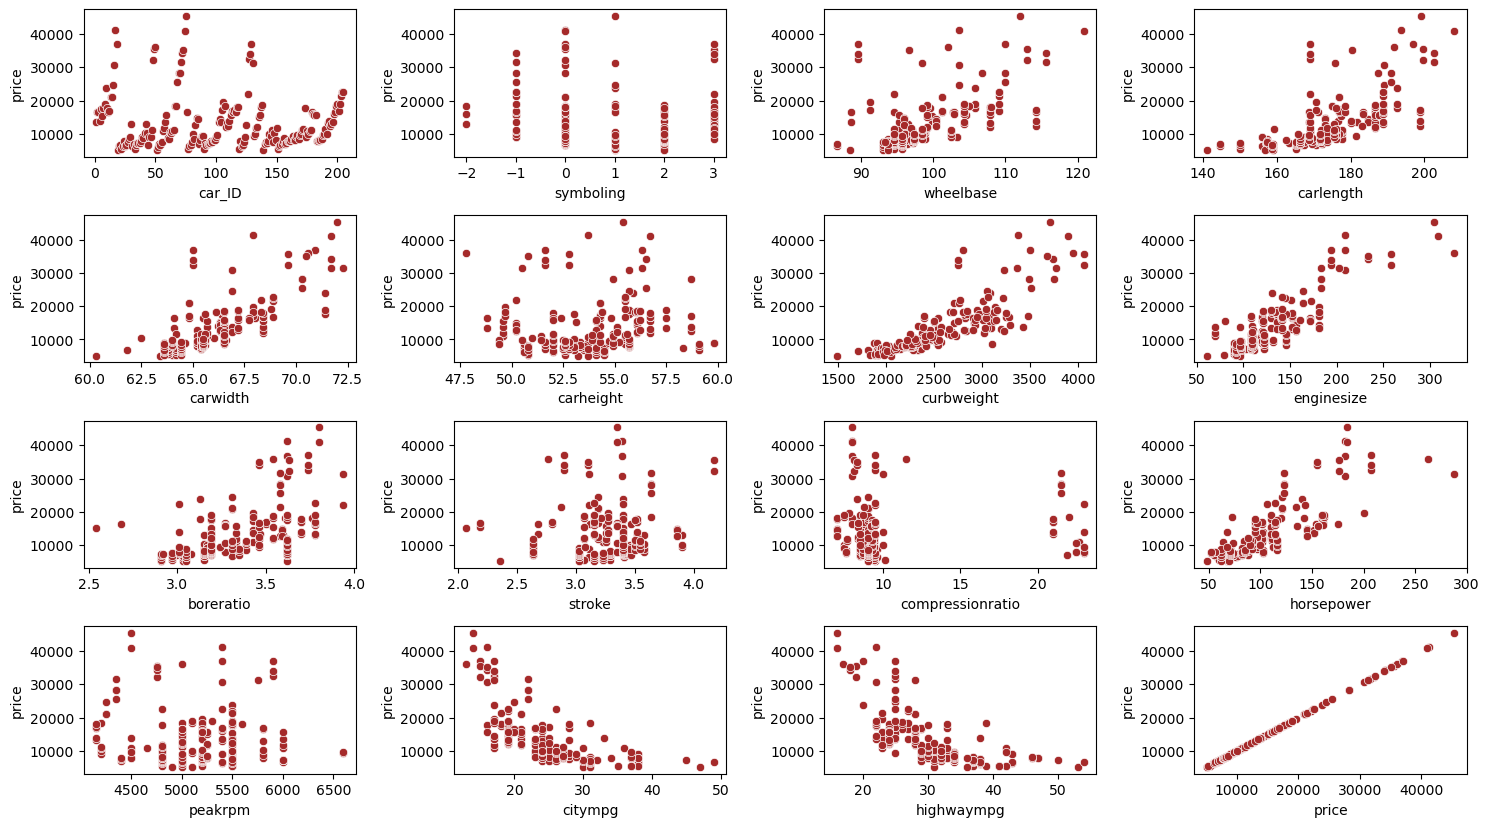

In [114]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='price',color='brown')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

linear relation between target and other freatures

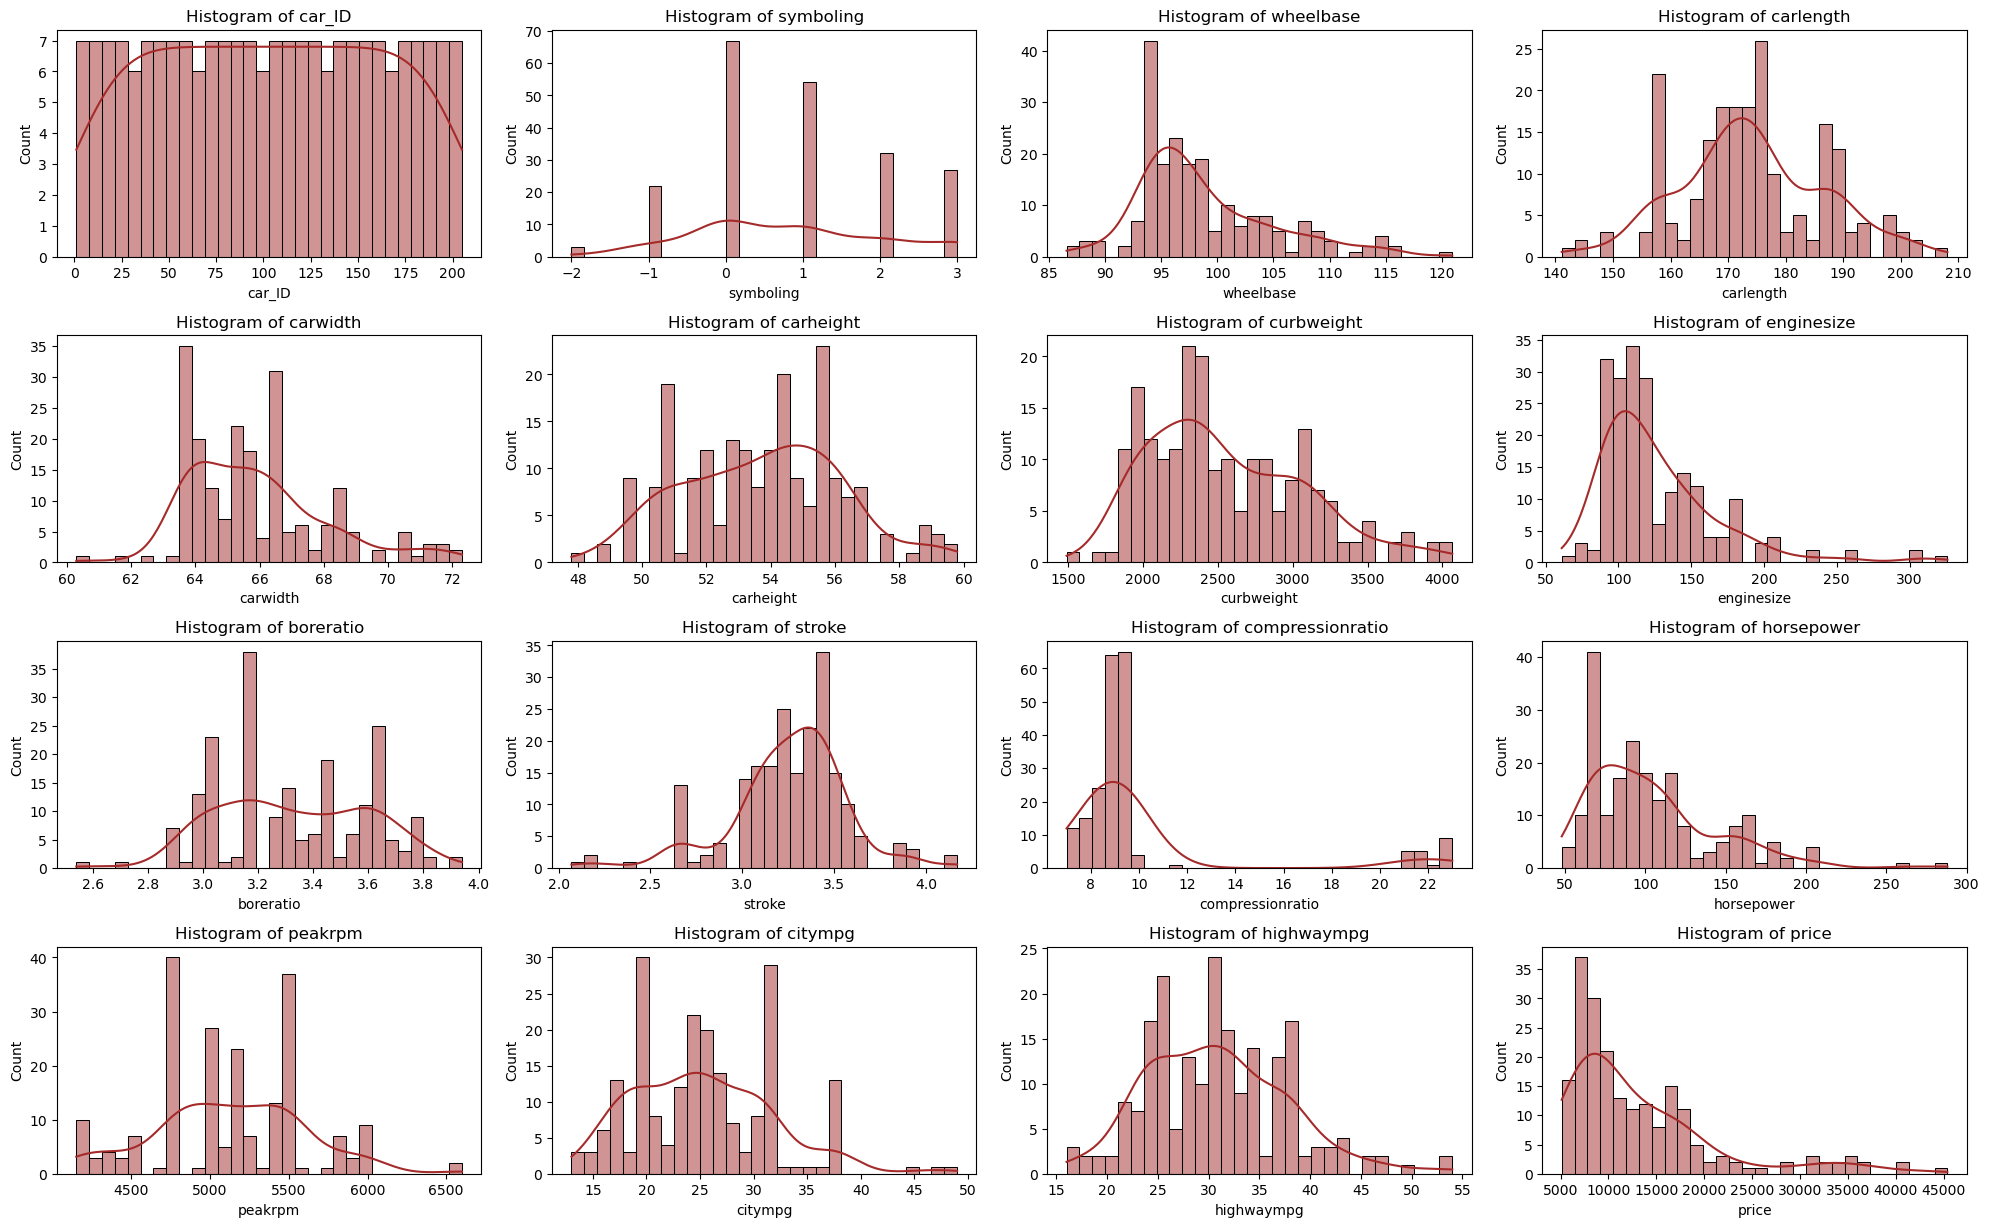

In [112]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df[col], kde=True, bins=30,color='brown')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show() 

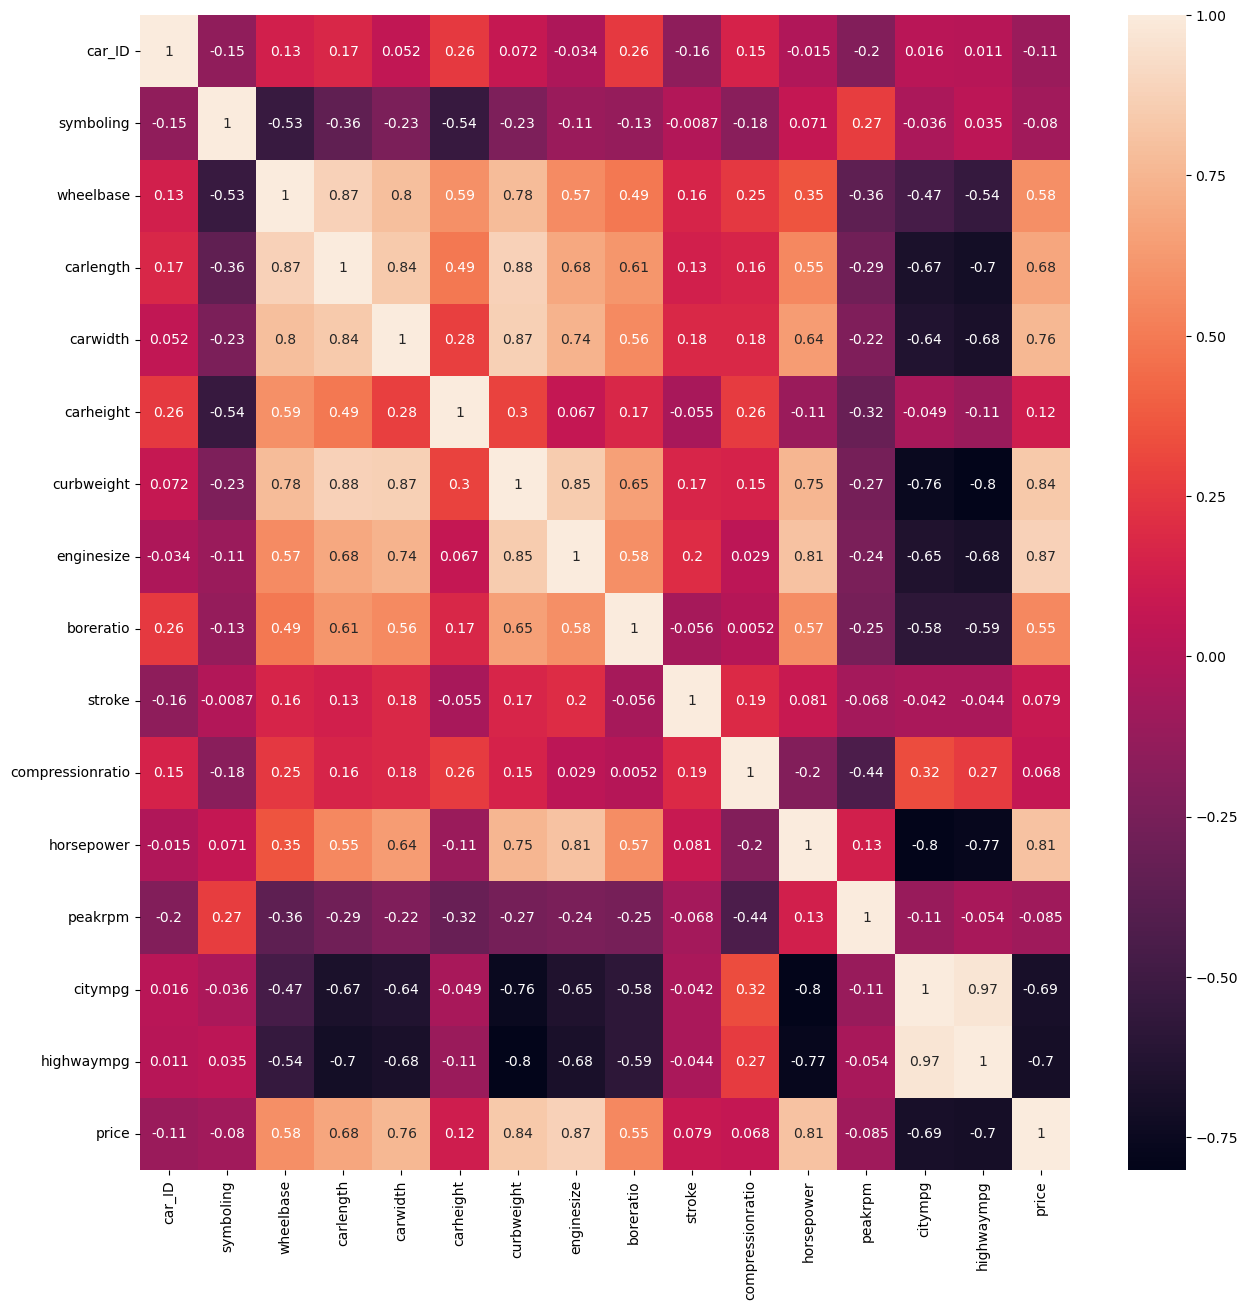

In [88]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True,color='g')
plt.show()

In [90]:
# Checking the number of unique values in each categorical column
cat_cols = df.select_dtypes(include=['object', 'category']).columns

unique_counts = df[cat_cols].nunique()
unique_counts

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

Distribution of CarName:
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


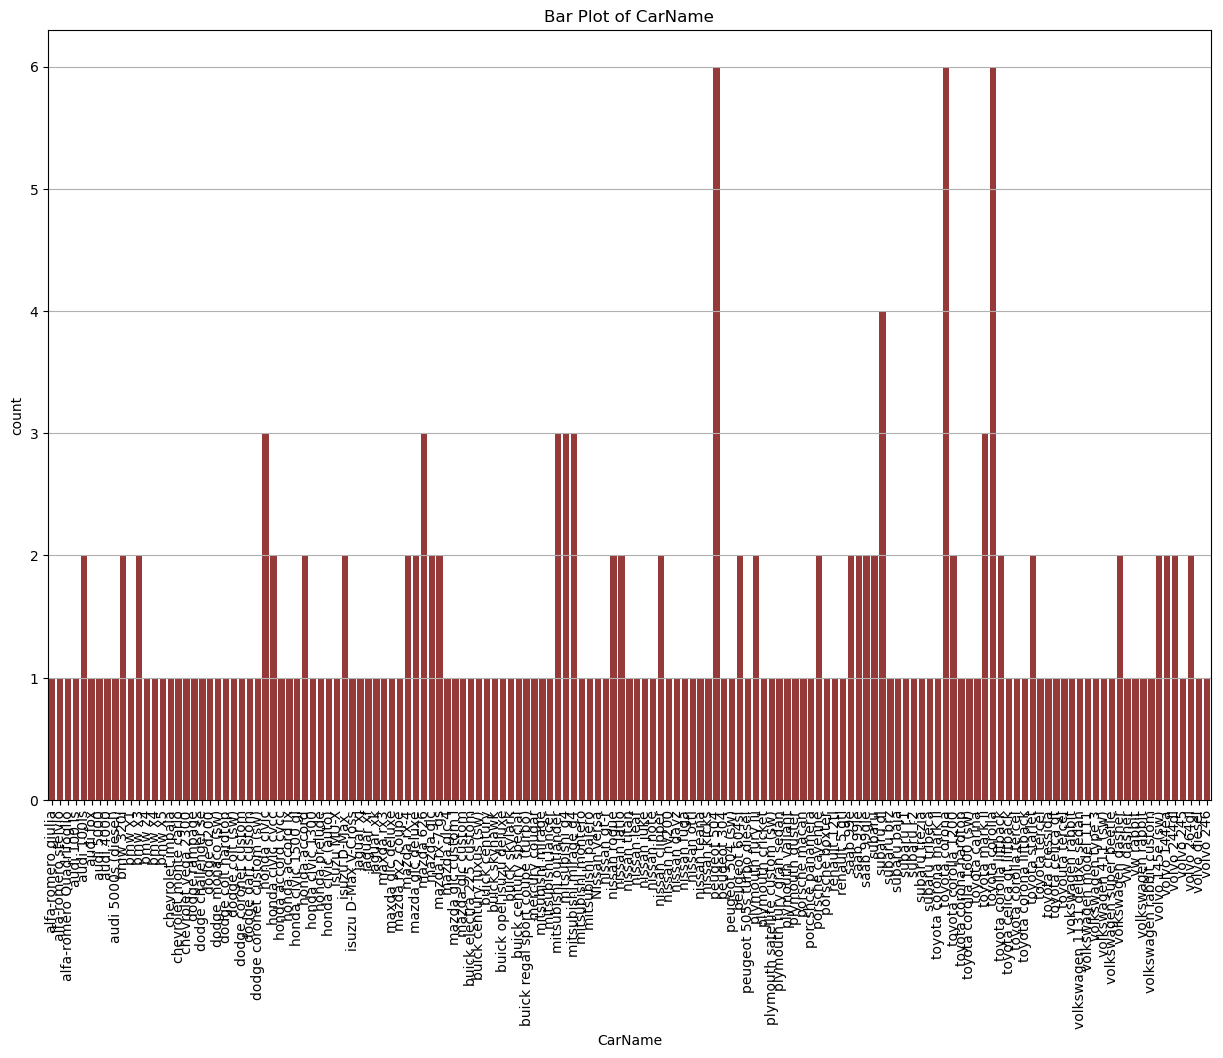

Distribution of fueltype:
fueltype
gas       185
diesel     20
Name: count, dtype: int64


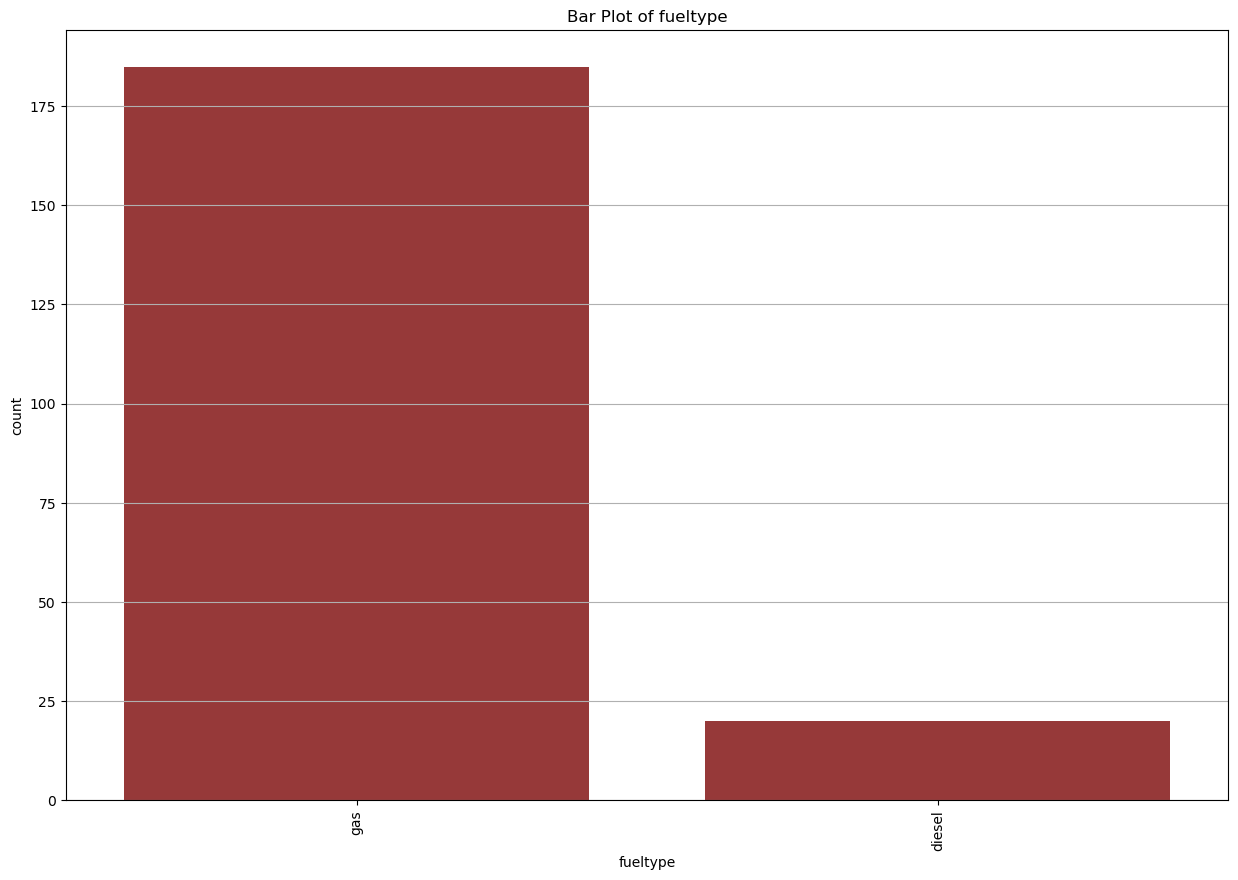

Distribution of aspiration:
aspiration
std      168
turbo     37
Name: count, dtype: int64


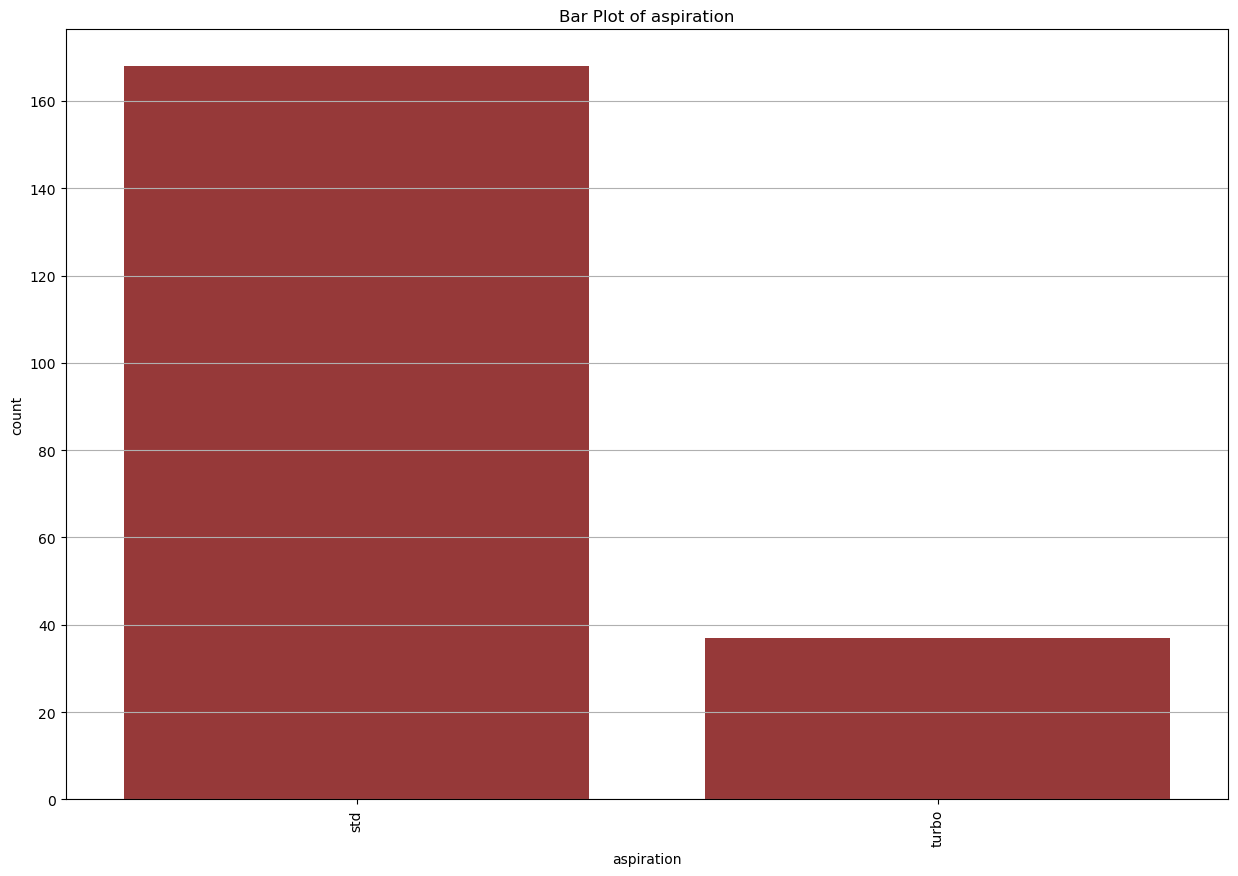

Distribution of doornumber:
doornumber
four    115
two      90
Name: count, dtype: int64


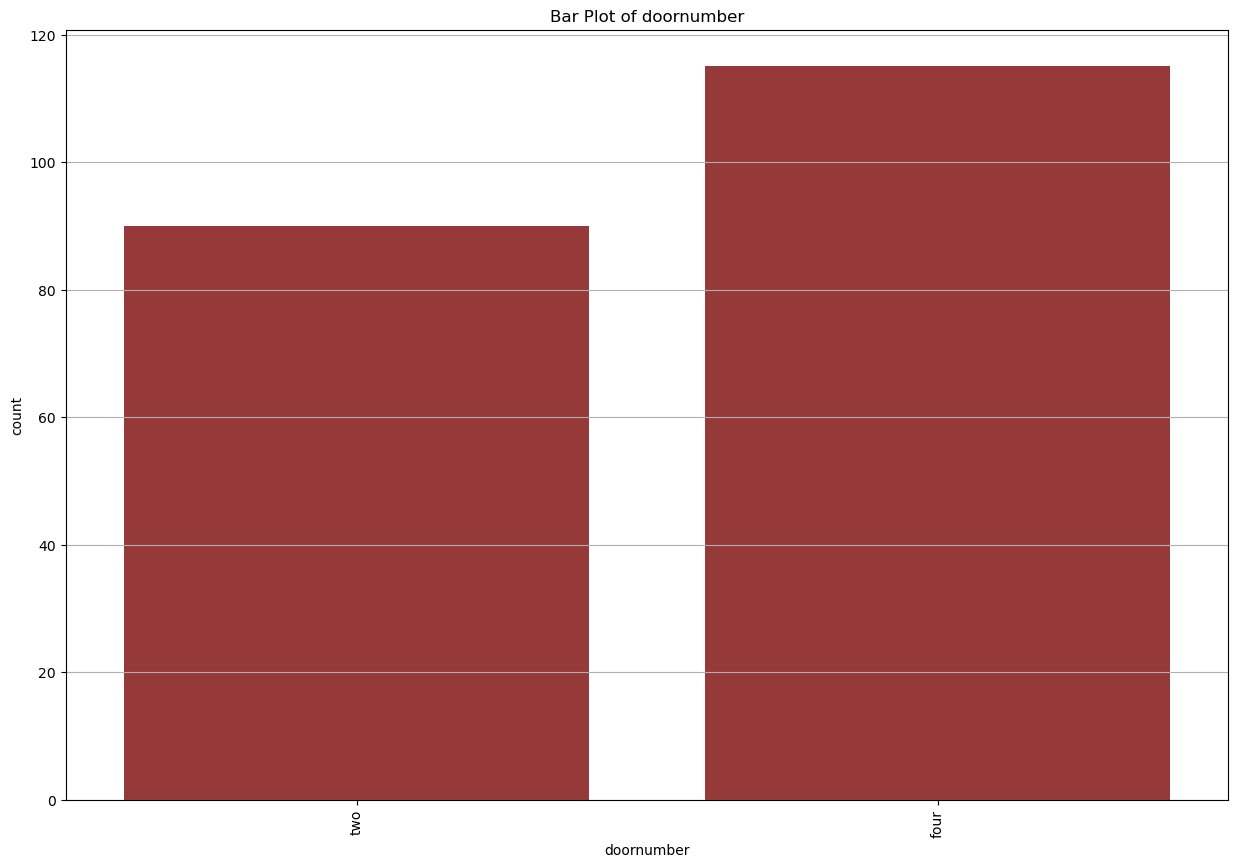

Distribution of carbody:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


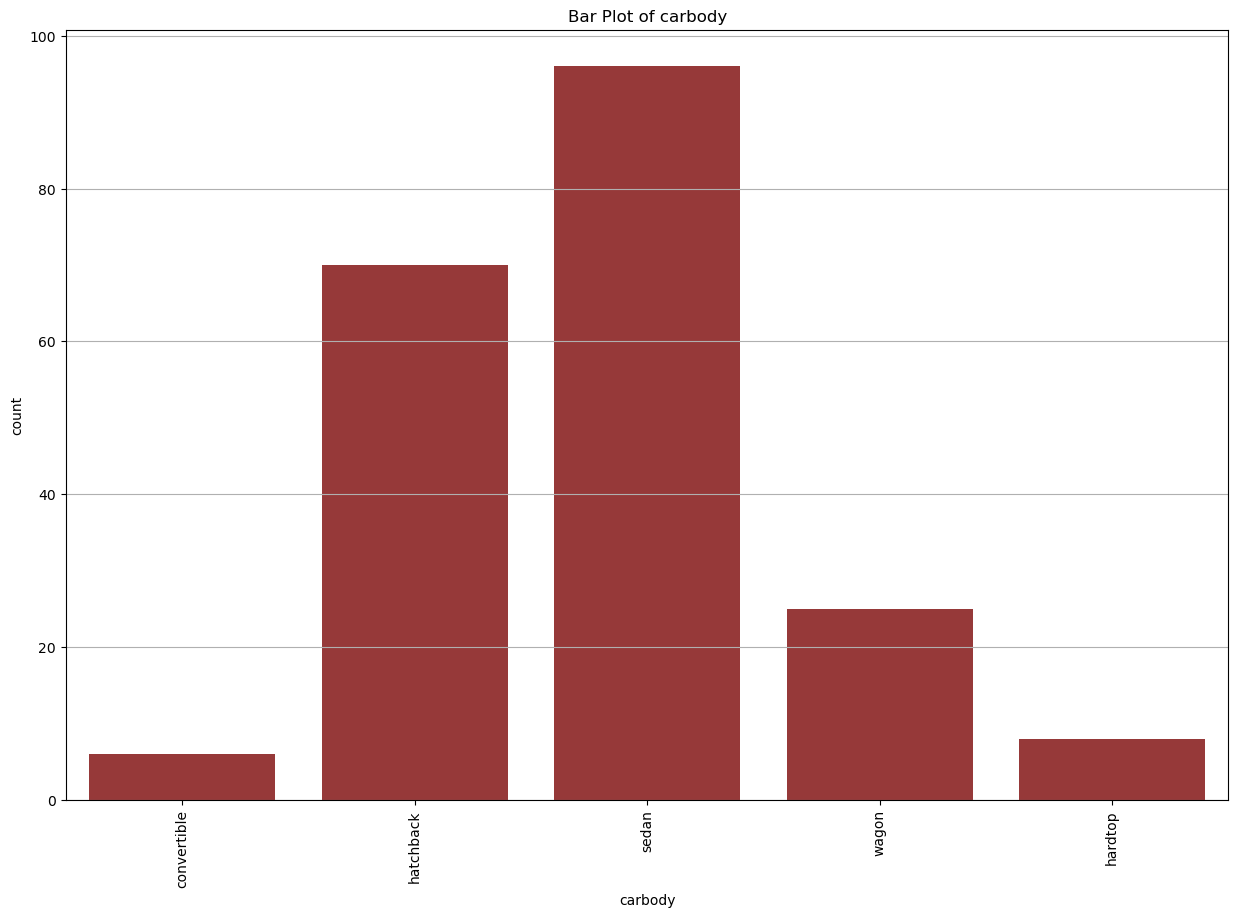

Distribution of drivewheel:
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


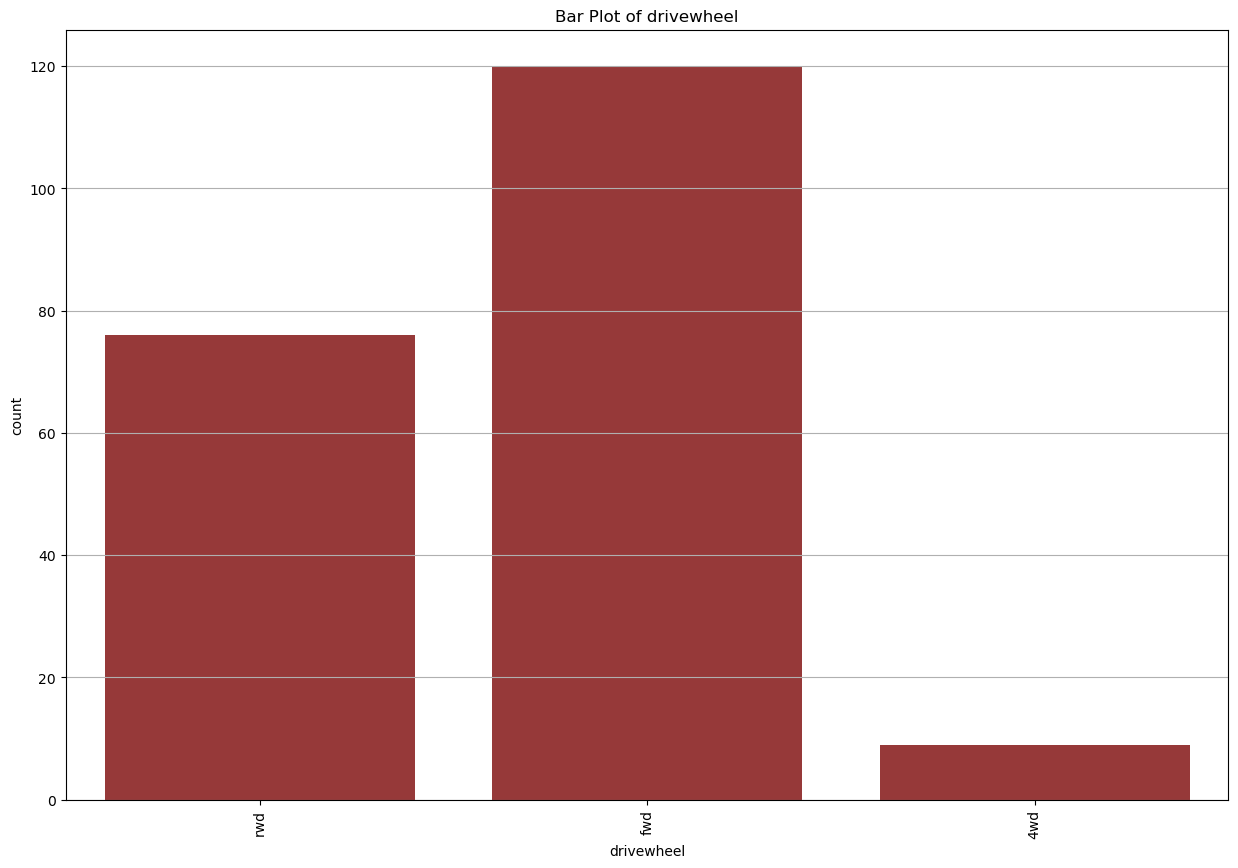

Distribution of enginelocation:
enginelocation
front    202
rear       3
Name: count, dtype: int64


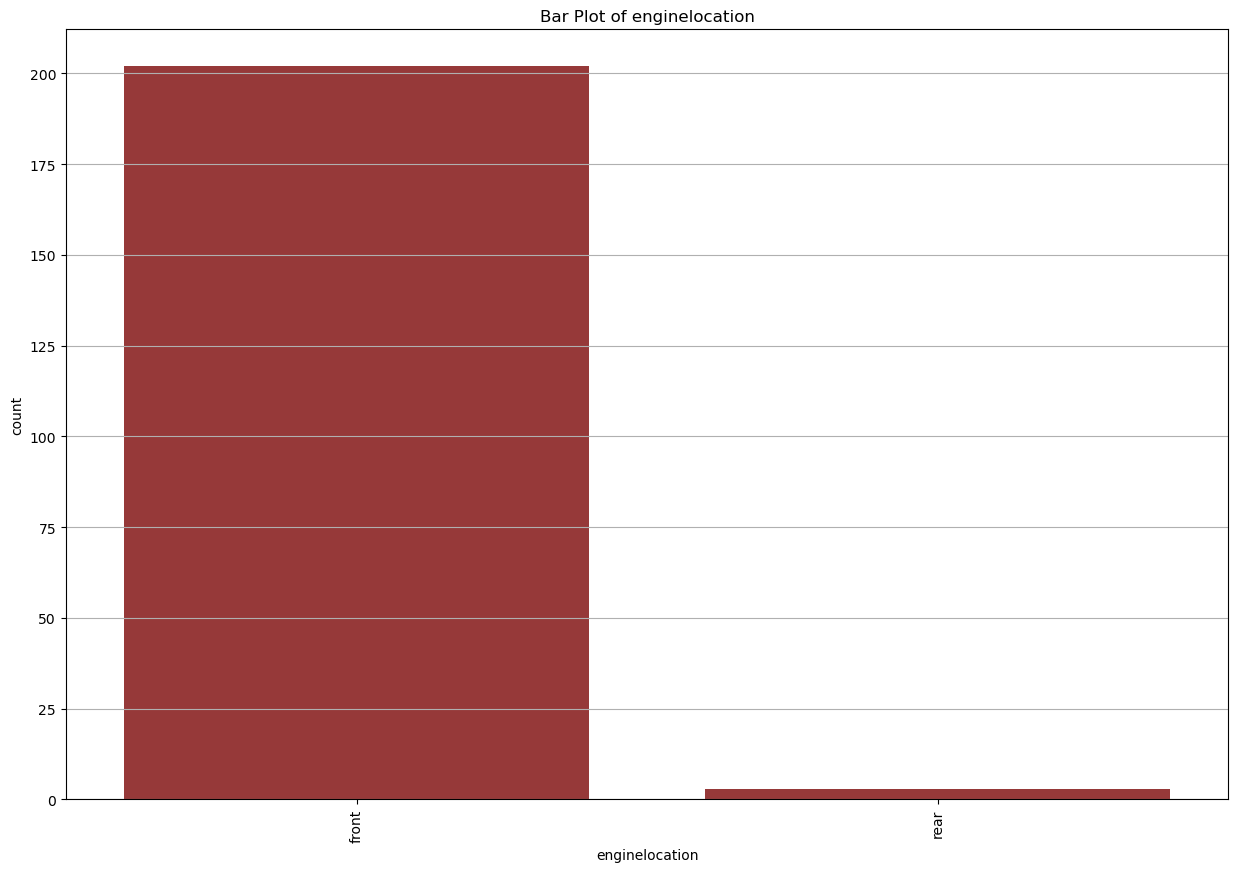

Distribution of enginetype:
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


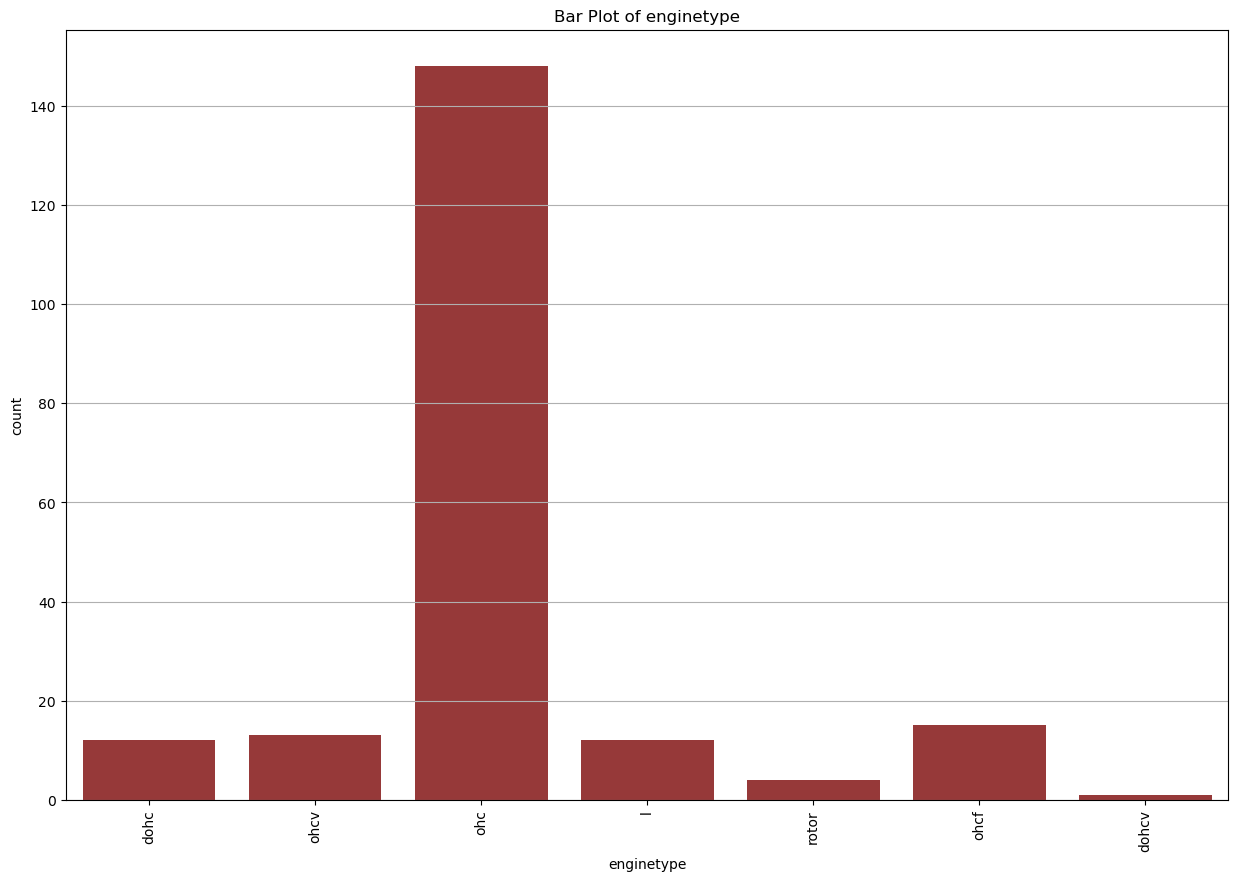

Distribution of cylindernumber:
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


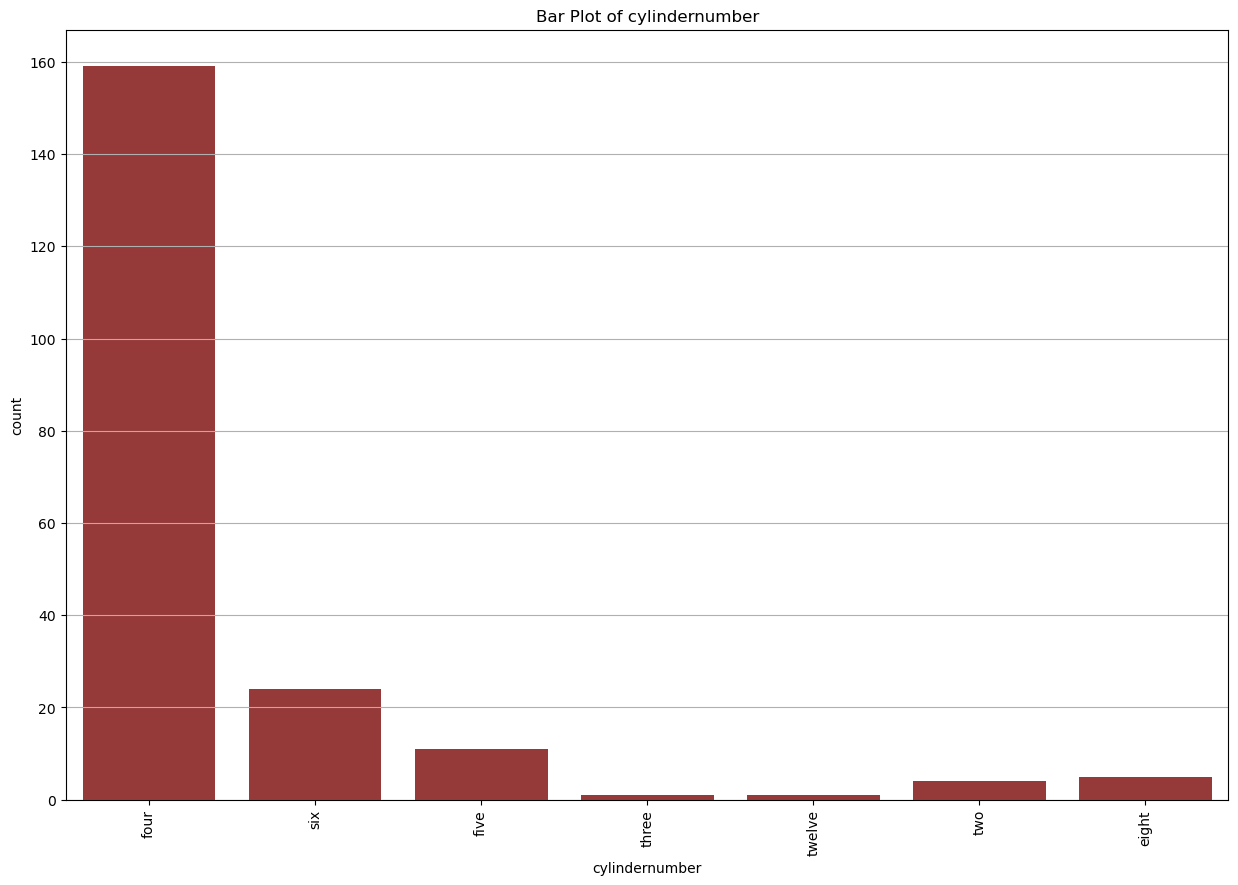

Distribution of fuelsystem:
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


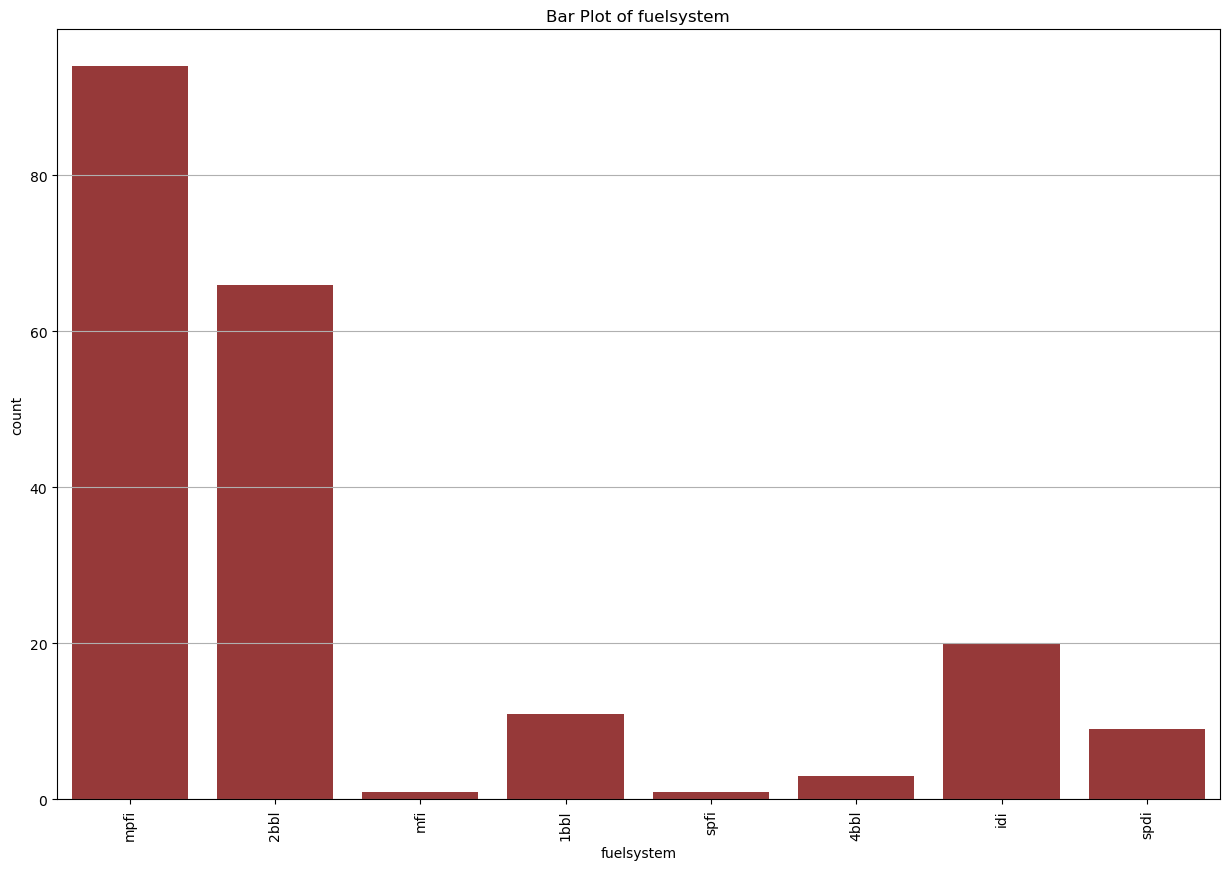

In [110]:
# Distribution of column and unique values
for col in cat_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())

    # Bar plot visualization
    plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df,color='brown')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)

     # Grid lines only for y-axis
    plt.grid(axis='y')
    
    plt.show()

In [118]:
df1=df.copy()

In [120]:
df1.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [122]:
# Handling outliers (IQR)
numerical_columns= df1.select_dtypes(include=['number']).columns.tolist()

In [124]:
# Calculate Q1, Q3, and IQR
Q1 = df1[numerical_columns].quantile(0.25)
Q3 = df1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df1[numerical_columns] < lower_bound) | (df1[numerical_columns] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
car_ID               0
symboling            0
wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
boreratio            0
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
price               15
dtype: int64


In [126]:
# Capping
df1[numerical_columns] = df1[numerical_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [128]:
df1[numerical_columns].shape

(205, 16)

In [130]:
s=df1[numerical_columns].skew()

### Visualisation after capping outliers

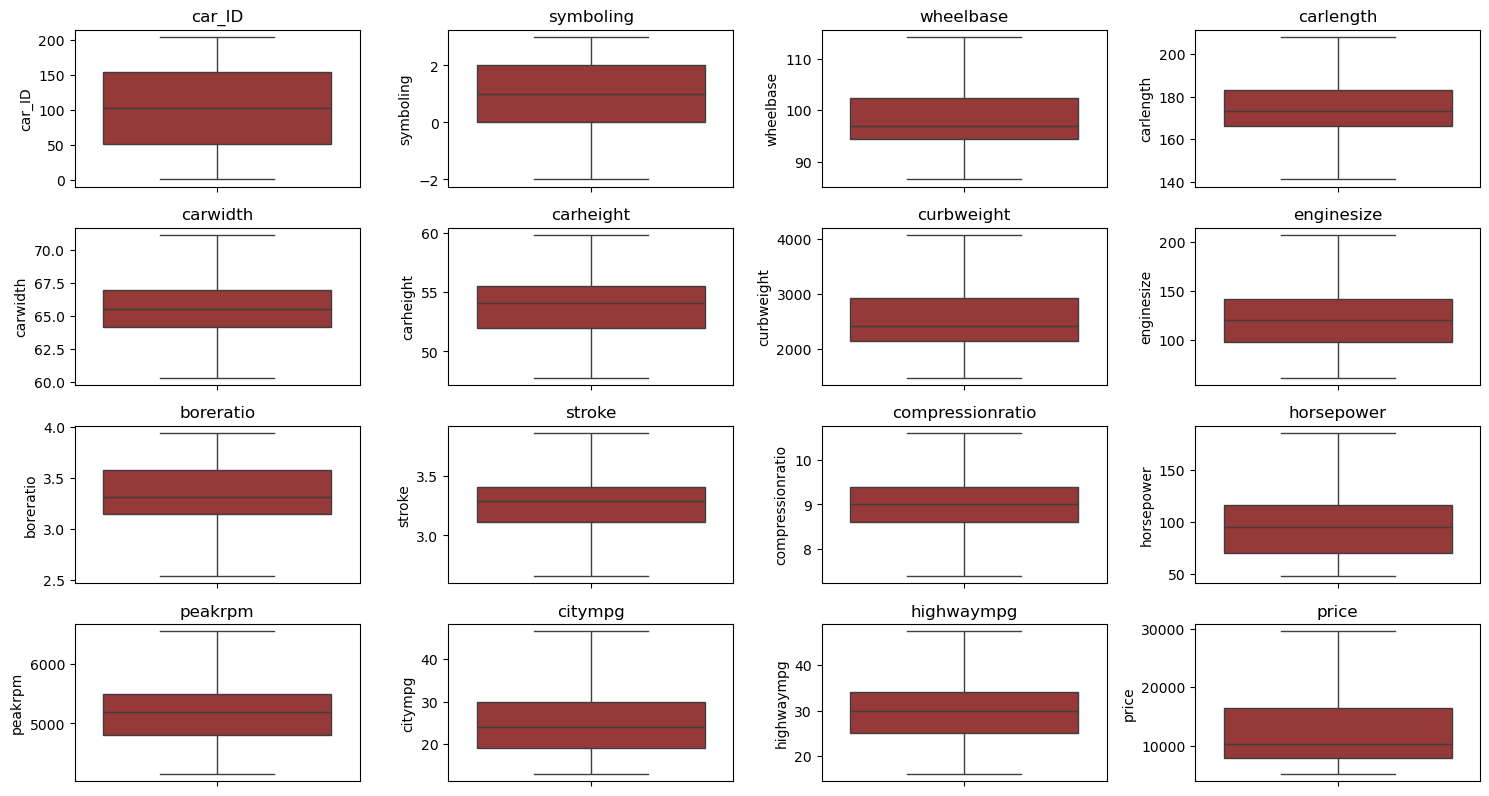

In [132]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[numerical_columns]):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df1[col],color='brown')
    plt.title(col)
plt.tight_layout()
plt.show()

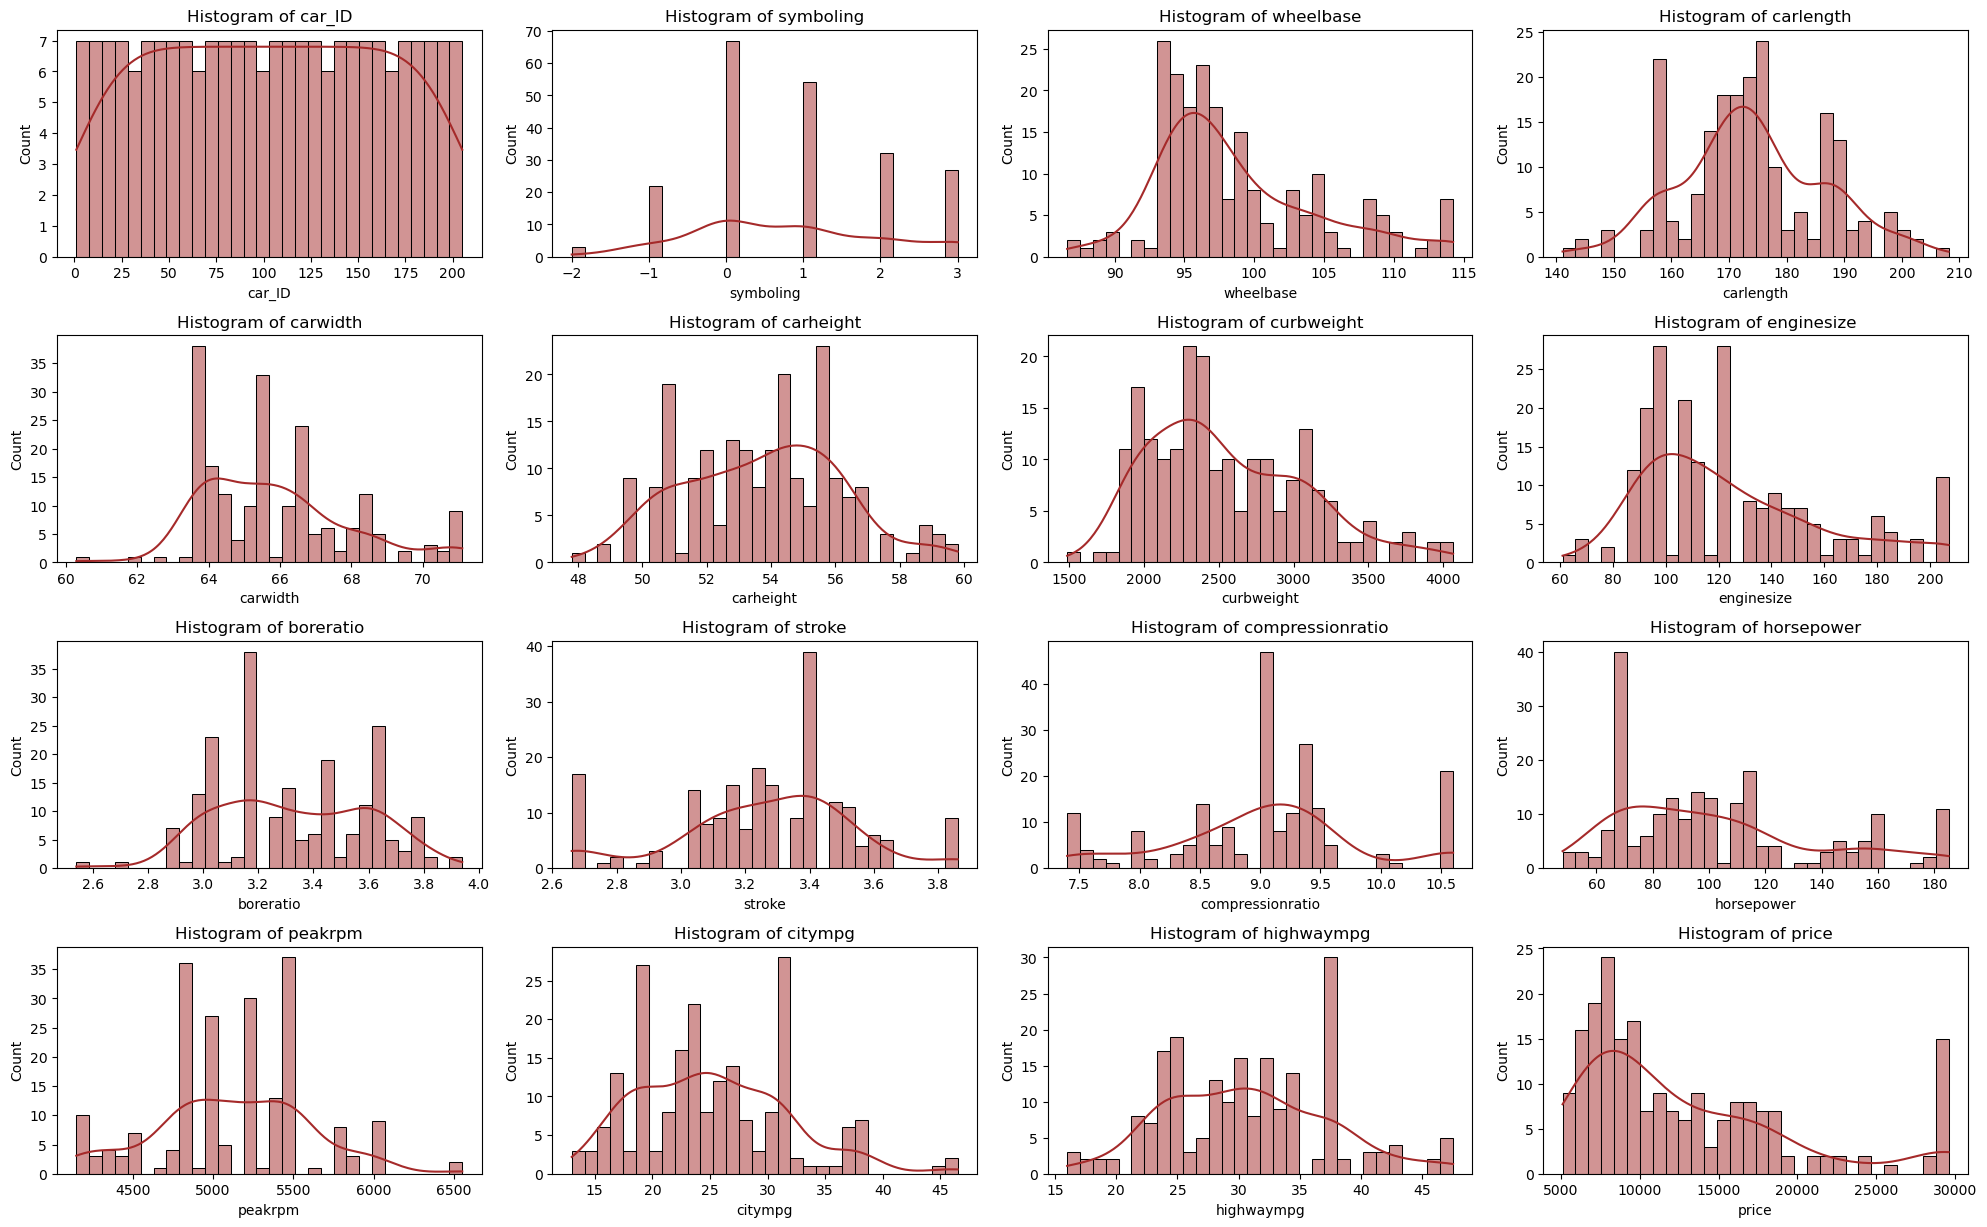

In [184]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[numerical_columns], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30,color='brown')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

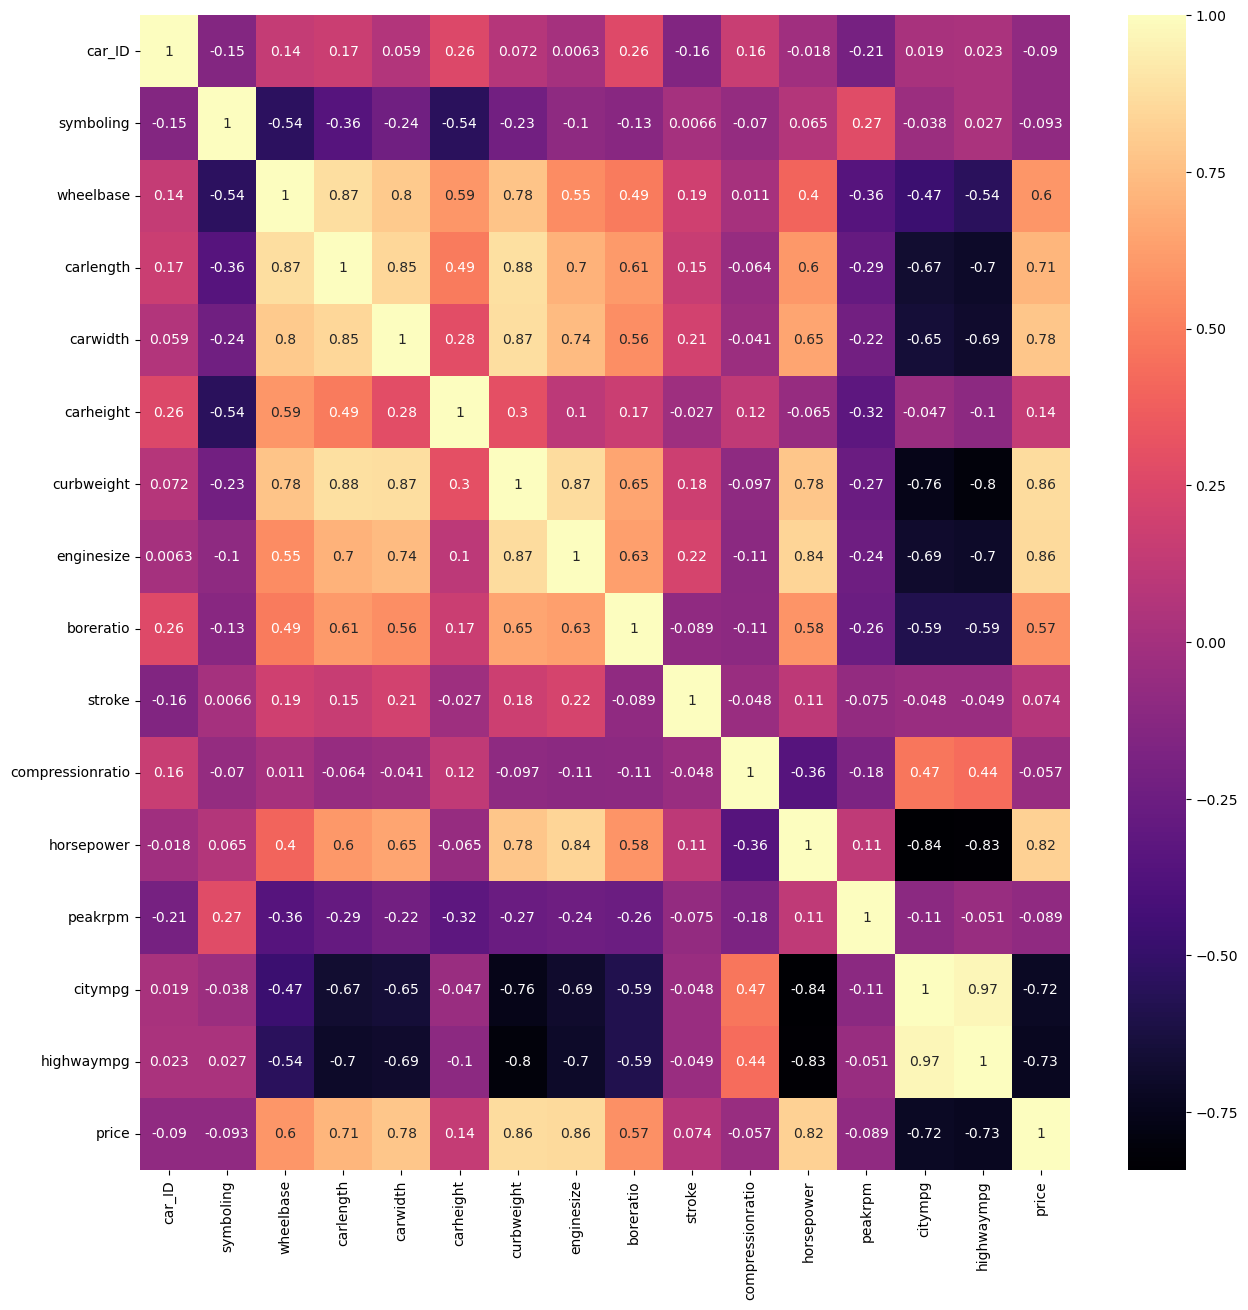

In [180]:
plt.figure(figsize=(15,15))
sns.heatmap(df1[numerical_columns].corr(),annot=True,cmap='magma')
plt.show()

# Encoding Categorical Variables

In [142]:
# Checking the number of unique values in each categorical column
unique_counts = df1.select_dtypes(include='object').nunique()
unique_counts

CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [146]:
Categorical_cols = df1.select_dtypes(include='object').columns
Categorical_cols.shape 

(10,)

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

binary_cols = ['doornumber', 'cylindernumber','CarName']
for col in binary_cols:
    df1[col] = le.fit_transform(df1[col])

# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['carbody', 'drivewheel', 'fueltype', 'aspiration', 'enginelocation','fuelsystem','enginetype'])

df1.tail(5)

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
200,201,-1,139,0,109.1,188.8,68.9,55.5,2952,2,...,True,False,False,False,False,False,True,False,False,False
201,202,-1,138,0,109.1,188.8,68.8,55.5,3049,2,...,True,False,False,False,False,False,True,False,False,False
202,203,-1,140,0,109.1,188.8,68.9,55.5,3012,3,...,True,False,False,False,False,False,False,False,True,False
203,204,-1,142,0,109.1,188.8,68.9,55.5,3217,3,...,False,False,False,False,False,False,True,False,False,False
204,205,-1,143,0,109.1,188.8,68.9,55.5,3062,2,...,True,False,False,False,False,False,True,False,False,False


In [150]:
boolean_cols = df1.select_dtypes(include='bool').columns
df1[boolean_cols] = df1[boolean_cols].astype(int)

df1

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,2,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
1,2,3,3,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
2,3,1,1,1,94.5,171.2,65.5,52.4,2823,3,...,1,0,0,0,0,0,0,0,1,0
3,4,2,4,0,99.8,176.6,66.2,54.3,2337,2,...,1,0,0,0,0,0,1,0,0,0
4,5,2,5,0,99.4,176.6,66.4,54.3,2824,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,0,109.1,188.8,68.9,55.5,2952,2,...,1,0,0,0,0,0,1,0,0,0
201,202,-1,138,0,109.1,188.8,68.8,55.5,3049,2,...,1,0,0,0,0,0,1,0,0,0
202,203,-1,140,0,109.1,188.8,68.9,55.5,3012,3,...,1,0,0,0,0,0,0,0,1,0
203,204,-1,142,0,109.1,188.8,68.9,55.5,3217,3,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

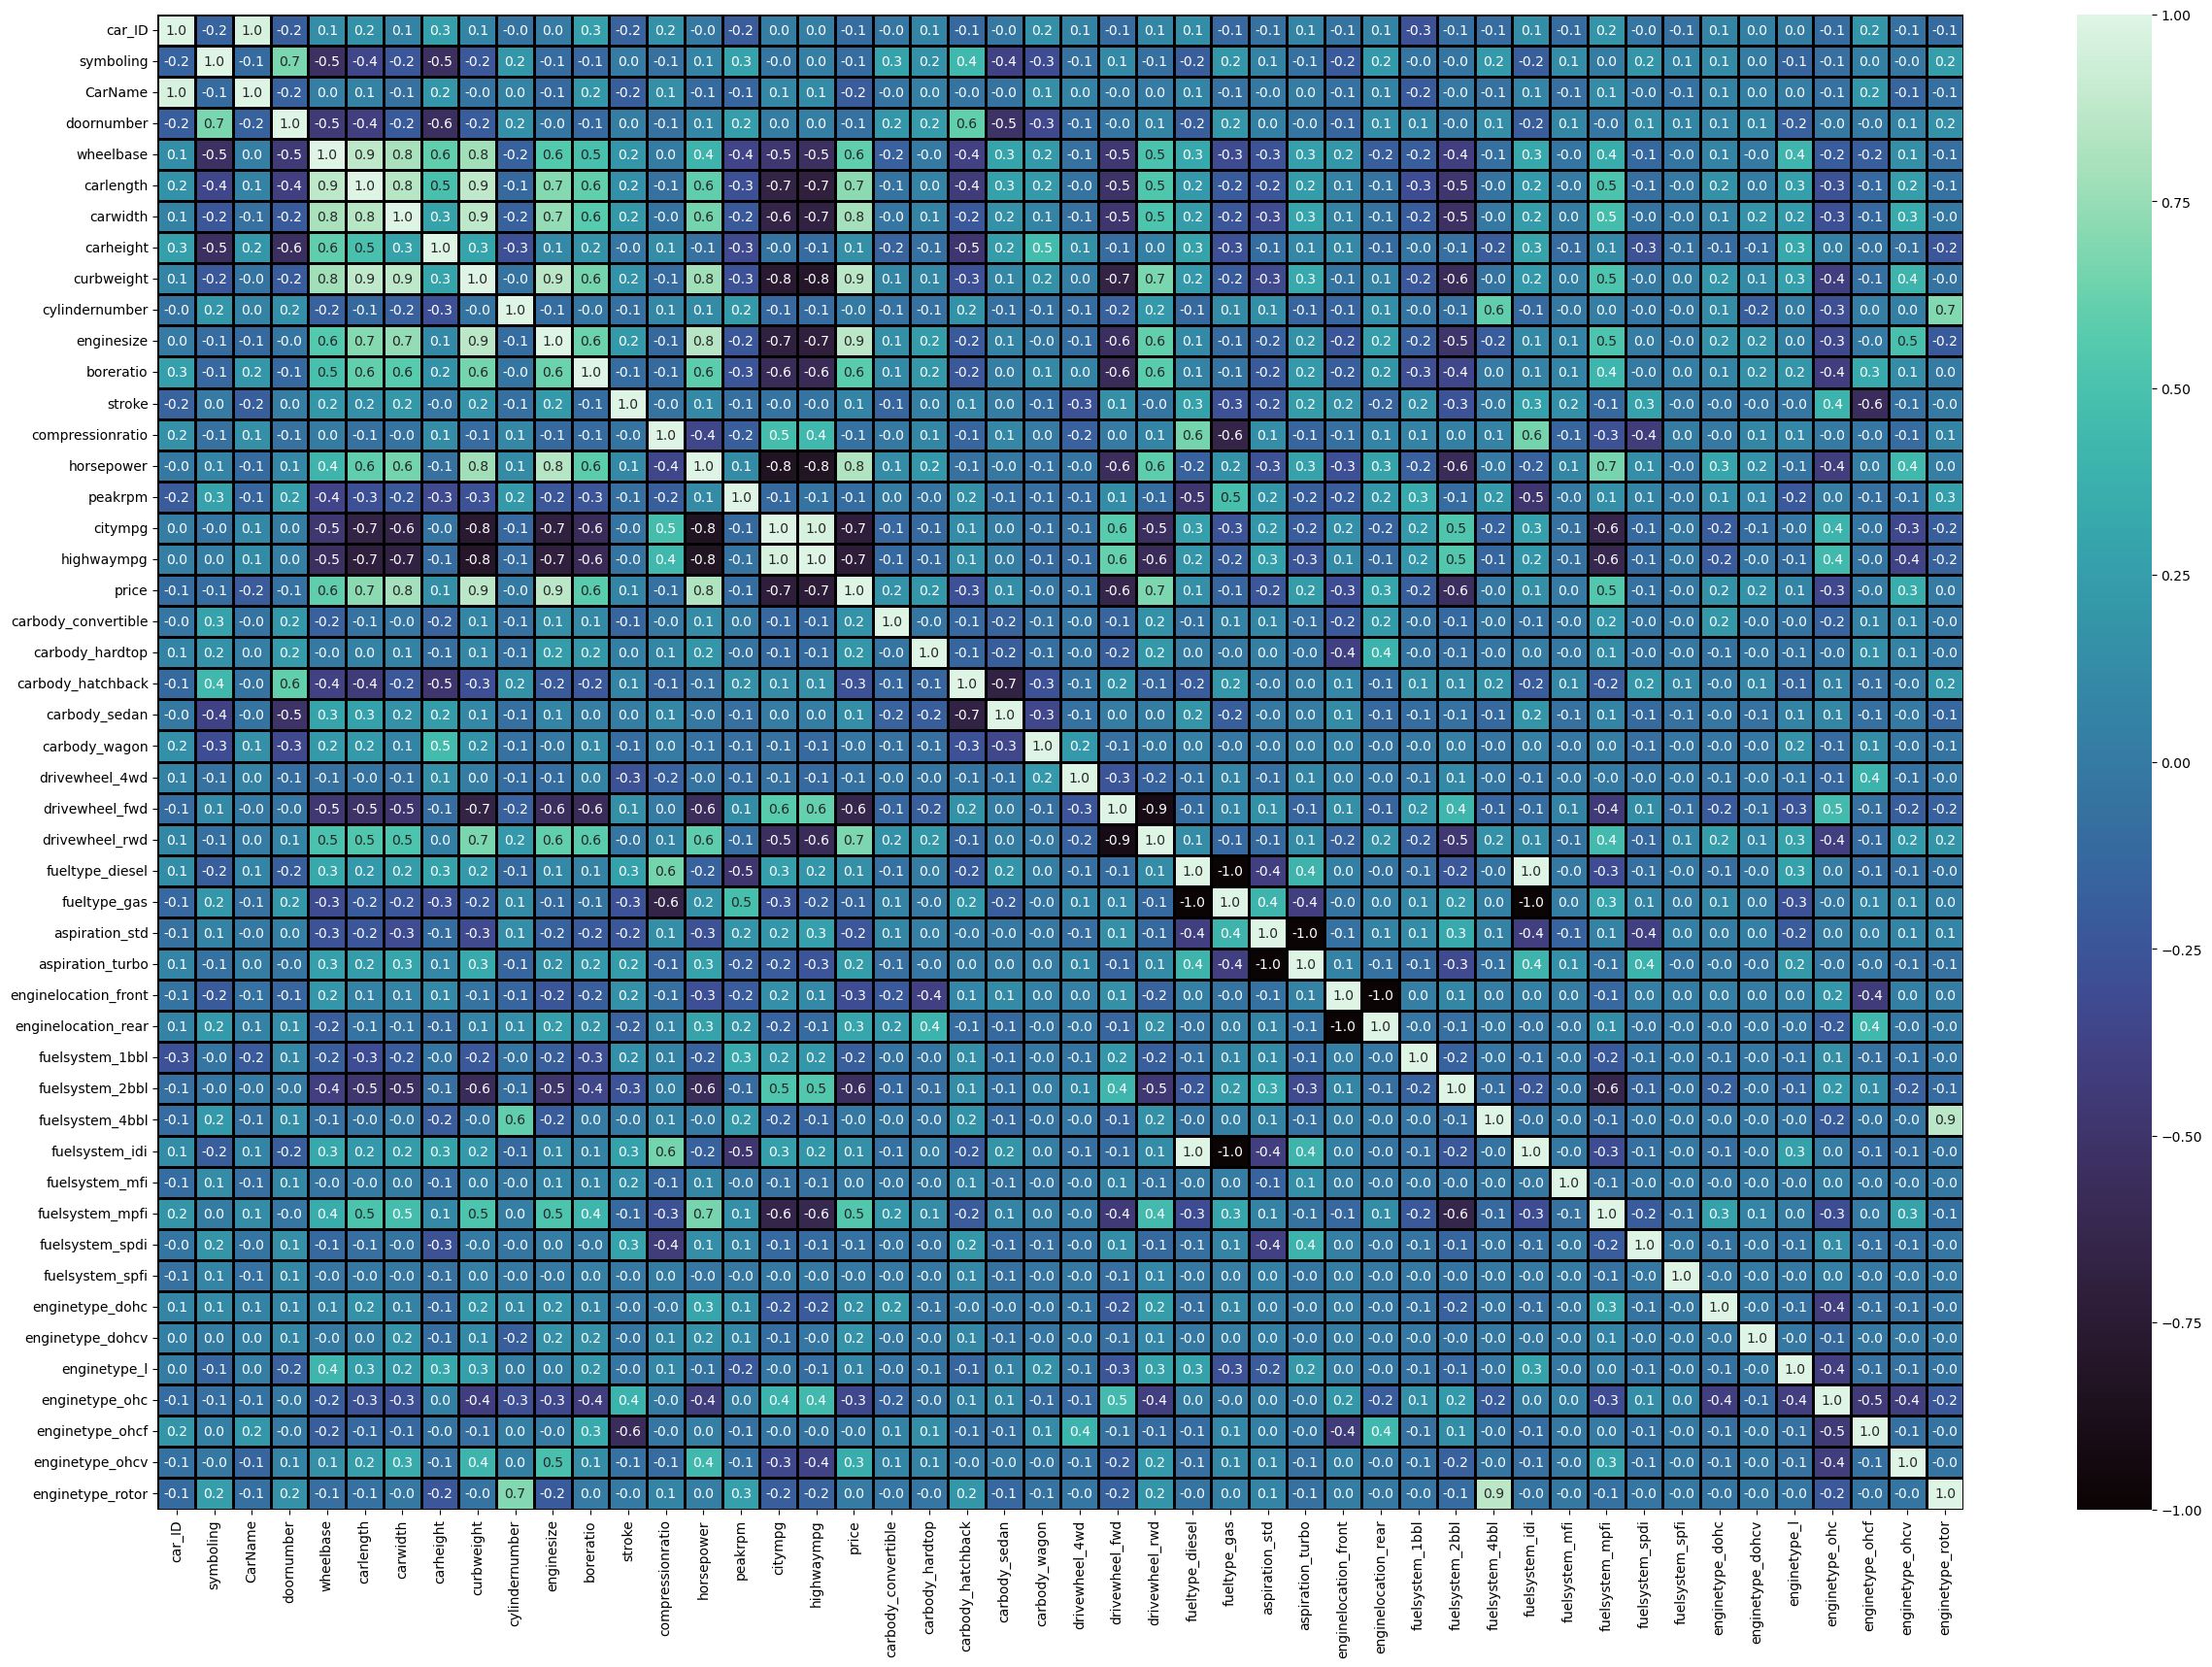

In [174]:
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot=True,  cmap='mako', fmt="0.1f", linewidth=1,linecolor='black')

### Splitting data and setting target variable


In [187]:
df2 = df1.copy()
y = df2['price']

In [189]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [191]:
x = df2.drop('price', axis=1)
x

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,2,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
1,2,3,3,1,88.6,168.8,64.1,48.8,2548,2,...,1,0,0,1,0,0,0,0,0,0
2,3,1,1,1,94.5,171.2,65.5,52.4,2823,3,...,1,0,0,0,0,0,0,0,1,0
3,4,2,4,0,99.8,176.6,66.2,54.3,2337,2,...,1,0,0,0,0,0,1,0,0,0
4,5,2,5,0,99.4,176.6,66.4,54.3,2824,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,0,109.1,188.8,68.9,55.5,2952,2,...,1,0,0,0,0,0,1,0,0,0
201,202,-1,138,0,109.1,188.8,68.8,55.5,3049,2,...,1,0,0,0,0,0,1,0,0,0
202,203,-1,140,0,109.1,188.8,68.9,55.5,3012,3,...,1,0,0,0,0,0,0,0,1,0
203,204,-1,142,0,109.1,188.8,68.9,55.5,3217,3,...,0,0,0,0,0,0,1,0,0,0


# 2. Model Implementation

## Feature Selection: Filter Methods

##### RandomForestRegressor

In [197]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x, y)

RandomForestRegressor(random_state=42)

In [199]:
# Get feature importances
importances = rf.feature_importances_

# Pair feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
8             curbweight    0.479740
10            enginesize    0.297671
14            horsepower    0.066538
17            highwaympg    0.066089
0                 car_ID    0.016785
2                CarName    0.010927
6               carwidth    0.010481
16               citympg    0.010475
5              carlength    0.006813
4              wheelbase    0.006374
15               peakrpm    0.005377
7              carheight    0.004328
12                stroke    0.003856
11             boreratio    0.003737
13      compressionratio    0.001390
37       fuelsystem_mpfi    0.001374
20     carbody_hatchback    0.001104
24        drivewheel_fwd    0.000818
1              symboling    0.000711
25        drivewheel_rwd    0.000557
21         carbody_sedan    0.000549
33       fuelsystem_2bbl    0.000512
43        enginetype_ohc    0.000510
9         cylindernumber    0.000476
28        aspiration_std    0.000464
18   carbody_convertible    0.000353
2

In [201]:
threshold = 0.01  # Adjust this value as needed
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
#x_selected = x[selected_features]

print(selected_features)

8     curbweight
10    enginesize
14    horsepower
17    highwaympg
0         car_ID
2        CarName
6       carwidth
16       citympg
Name: Feature, dtype: object


#### SelectKBest Filter

In [204]:
from sklearn.feature_selection import SelectKBest, f_regression

# . Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=12)

# . Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

# . Get the scores for each feature
feature_scores = k_best.scores_

#  Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("2. SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(12)

print(scores_sorted)

# Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)

2. SelectKBest Results:
Features selected: 12
Selected features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl']

Feature Scores:
            Feature       Score
8        curbweight  601.050415
10       enginesize  576.892844
14       horsepower  422.030341
6          carwidth  322.157252
17       highwaympg  236.683643
16          citympg  216.370488
5         carlength  209.259842
25   drivewheel_rwd  168.411982
24   drivewheel_fwd  138.605785
4         wheelbase  111.780954
11        boreratio   99.069049
33  fuelsystem_2bbl   88.285365


### Identifying the significant variables affecting car prices

In [207]:
print(scores_sorted)

            Feature       Score
8        curbweight  601.050415
10       enginesize  576.892844
14       horsepower  422.030341
6          carwidth  322.157252
17       highwaympg  236.683643
16          citympg  216.370488
5         carlength  209.259842
25   drivewheel_rwd  168.411982
24   drivewheel_fwd  138.605785
4         wheelbase  111.780954
11        boreratio   99.069049
33  fuelsystem_2bbl   88.285365


In [209]:
X_k_best_df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,1.0,0.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,0.0,1.0,0.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,0.0,1.0,0.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,1.0,0.0,0.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0,0.0,1.0,0.0
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0,0.0,1.0,0.0
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0,0.0,1.0,0.0
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0,0.0,1.0,0.0


### Feature Scaling

In [212]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [214]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [216]:
X_standardized = standard_scaler.fit_transform(X_k_best_df)
X_normalized = minmax_scaler.fit_transform(X_k_best_df)

In [220]:
# Converting to DataFrames
X_standardized = pd.DataFrame(X_standardized, columns=selected_features)
X_normalized = pd.DataFrame(X_normalized, columns=selected_features)
X_standardized

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl
0,-1.723005,-0.426521,-0.858695,-0.014566,0.160196,0.519071,0.229801,-0.649321,-0.552143,-1.188177,1.302831,-0.689072
1,-1.723005,-0.426521,-0.858695,-0.014566,0.160196,0.519071,0.229801,-0.649321,-0.552143,-1.188177,1.302831,-0.689072
2,-0.717590,-0.231513,-0.184978,0.514882,0.809329,-2.404880,1.441341,-0.958163,-0.702161,-1.188177,1.302831,-0.689072
3,0.185580,0.207256,0.151880,-0.420797,-0.459430,-0.517266,-0.023777,-0.186058,-0.102086,0.841625,-0.767559,-0.689072
4,0.117416,0.207256,0.248125,0.516807,0.337232,-0.517266,0.342502,-1.112584,-1.302237,-1.188177,-0.767559,-0.689072
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.770387,1.198549,1.451189,0.763241,0.484762,1.666445,0.314327,-0.340479,-0.402124,-1.188177,1.302831,-0.689072
201,1.770387,1.198549,1.403066,0.949992,0.484762,1.666445,1.610393,-0.958163,-0.852180,-1.188177,1.302831,-0.689072
202,1.770387,1.198549,1.451189,0.878757,1.428955,0.926204,0.877834,-1.112584,-1.152218,-1.188177,1.302831,-0.689072
203,1.770387,1.198549,1.451189,1.273437,0.602787,-1.183483,0.088924,0.122783,-0.552143,-1.188177,1.302831,-0.689072


### Split Data into Training and Testing Sets

In [223]:
X_k_best.shape

(205, 12)

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state=42)

In [227]:
# Print dataset shapes to confirm correctness
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (164, 12)
X_test shape: (41, 12)
y_train shape: 164
y_test shape: 41


In [229]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Scaling features...


# Build the ML Model


In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'DecisionTreeRegression' : DecisionTreeRegressor(),
}


Training models...


# 3. Model Evaluation 

In [242]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # . Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training DecisionTreeRegression...


In [244]:
# Print model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


#best model = highest R2 score


Model Performance:

Linear Regression:
MAE: 2113.4676
MSE: 7517013.3599
RMSE: 2741.7172
R2: 0.8581

SVR:
MAE: 5095.4857
MSE: 57699512.1483
RMSE: 7596.0195
R2: -0.0895

Random Forest:
MAE: 1023.6786
MSE: 2017957.2337
RMSE: 1420.5482
R2: 0.9619

Gradient Boosting:
MAE: 998.1674
MSE: 1778340.5308
RMSE: 1333.5443
R2: 0.9664

DecisionTreeRegression:
MAE: 1096.5081
MSE: 2108349.2886
RMSE: 1452.0156
R2: 0.9602


In [246]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Gradient Boosting


# 5 HyperParameter Tuning

In [249]:
#Hyperparameter to get higher value of R2
#. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }

elif isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200], 
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, DecisionTreeRegressor):
    param_grid = {
    'max_depth': [None, 10, 20],  # None means no limit on tree depth.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'max_features': [None, 'sqrt', 'log2']  # Features considered for best split.
}

else:
    param_grid = {}


Tuning best model...


In [251]:
from sklearn.model_selection import train_test_split, GridSearchCV
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# Saving the model

In [254]:
import joblib

#  Save the Model
print("\nSaving model...")
joblib.dump(best_model_name, 'Car_Price.joblib')
print("Model saved")


Saving model...
Model saved


### checking whether the performance of the model has increased.

In [259]:
print("\nTesting with  data...")
final_predictions = best_model.predict(x_test)
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}


Testing with  data...


In [261]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
MAE: 988.4428
MSE: 1712242.8883
RMSE: 1308.5270
R2: 0.9677


# Conclusion

Significant Factors Influencing Car Prices:
      Key variables affecting car prices include curb weight, engine size, horsepower, car width, and highway MPG.
        These factors emphasize the importance of engine performance, car dimensions, and fuel efficiency in shaping pricing dynamics.

1. Model Performance:
   Among the regression models, the Gradient Boosting Regressor and Random Forest Regressor exhibited the best performance, with 
          both achieving high accuracy. The Gradient Boosting Regressor slightly outperformed regarding error metrics such as MAE and RMSE.

2. Final Model Results:
    The final tuned model achieved an R2 value of 0.9677, explaining 96.77% of the variance in car prices.
            This high R2 indicates that the model is highly reliable for predicting car prices.